# Marital Status Classification (Married vs. Unmarried)

In [6]:
# import packages
import sklearn
import numpy as np
import pandas as pd

np.random.seed(16)

In [7]:
# load data
csv_file = "~/IDC5210_Machine_Learning/Project/demographics_sample.csv"
marriage_df = pd.read_csv(csv_file)
marriage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    2065 non-null   int64  
 1   Unnamed: 0      2065 non-null   int64  
 2   field_1         2065 non-null   int64  
 3   Cust_ID         2065 non-null   int64  
 4   Cust_Segment    2065 non-null   object 
 5   Branch_ID       2065 non-null   int64  
 6   Branch_Y        2065 non-null   float64
 7   Branch_X        2065 non-null   float64
 8   Home_Loc_Y      2065 non-null   float64
 9   Home_Loc_X      2065 non-null   float64
 10  Work_Loc_Y      2065 non-null   float64
 11  Work_Loc_X      2065 non-null   float64
 12  Gender          2065 non-null   object 
 13  Marital_Status  2065 non-null   object 
 14  Education_Lv    2065 non-null   object 
 15  Job_Status      2065 non-null   object 
 16  Income          2011 non-null   float64
 17  Age             2065 non-null   i

In [8]:
# drop unnecessary columns
marriage_df.drop(["Unnamed: 0", "Unnamed: 0.1", "field_1", "Cust_ID", "Branch_X", "Branch_Y", "Home_Loc_X", "Home_Loc_Y", "Work_Loc_X", "Work_Loc_Y"], axis = 1, inplace=True)
marriage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_Segment    2065 non-null   object 
 1   Branch_ID       2065 non-null   int64  
 2   Gender          2065 non-null   object 
 3   Marital_Status  2065 non-null   object 
 4   Education_Lv    2065 non-null   object 
 5   Job_Status      2065 non-null   object 
 6   Income          2011 non-null   float64
 7   Age             2065 non-null   int64  
 8   Years_w_Bank    2065 non-null   float64
 9   Penalty_201407  2065 non-null   object 
 10  Penalty_201408  2065 non-null   object 
 11  Penalty_201409  2065 non-null   object 
 12  Penalty_201410  2065 non-null   object 
 13  Penalty_201411  2065 non-null   object 
 14  Penalty_201412  2065 non-null   object 
 15  Penalty_201501  2065 non-null   object 
 16  Penalty_201502  2065 non-null   object 
 17  Penalty_201503  2065 non-null   o

In [9]:
# count risk types per row
risk_counts = marriage_df.iloc[:,9:21].apply(pd.Series.value_counts, axis=1)
risk_counts = risk_counts.fillna(0)

In [10]:
marriage_df = marriage_df.join(risk_counts)
marriage_df

,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Penalty_201407,...,Work_Region,Home_Region,Branch_Region,.,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,4)GECIKME 30-59 GUN,5)GECIKME 60+ GUN,6)TAKIP
0,BİREYSEL,638,E,EVLİ,LİSANSÜSTÜ,EMEKLİ,3000.0,48,15.0,1)RISKSIZ,...,MARMARA,MARMARA,MARMARA,0.0,11.0,1.0,0.0,0.0,0.0,0.0
1,BİREYSEL,170,E,BEKAR,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),1000.0,22,3.0,1)RISKSIZ,...,MARMARA,MARMARA,MARMARA,0.0,12.0,0.0,0.0,0.0,0.0,0.0
2,BİREYSEL,212,E,EVLİ,YÜKSEKOKUL,SERBEST MESLEK,4000.0,34,12.0,.,...,MARMARA,MARMARA,MARMARA,1.0,11.0,0.0,0.0,0.0,0.0,0.0
3,BİREYSEL,1239,E,BEKAR,LİSE,ÜCRETLİ (ÖZEL),1200.0,24,1.0,1)RISKSIZ,...,MARMARA,MARMARA,MARMARA,0.0,8.0,3.0,0.0,1.0,0.0,0.0
4,BİREYSEL,1277,E,EVLİ,ORTAOKUL,ÜCRETLİ (ÖZEL),1500.0,40,2.0,1)RISKSIZ,...,MARMARA,MARMARA,MARMARA,0.0,12.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,BİREYSEL,152,E,BEKAR,YÜKSEKOKUL,ÜCRETLİ (ÖZEL),2000.0,18,0.0,.,...,MARMARA,MARMARA,MARMARA,11.0,1.0,0.0,0.0,0.0,0.0,0.0
2061,BİREYSEL,568,E,EVLİ,ORTAOKUL,ÇALIŞMIYOR,2550.0,22,1.0,.,...,MARMARA,SE ANATOLIA,SE ANATOLIA,2.0,8.0,2.0,0.0,0.0,0.0,0.0
2062,BİREYSEL,1174,E,EVLİ,ORTAOKUL,ÜCRETLİ (ÖZEL),773.0,27,3.0,1)RISKSIZ,...,MARMARA,MARMARA,MARMARA,0.0,3.0,2.0,0.0,1.0,1.0,5.0
2063,BİREYSEL,607,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),1261.0,39,15.0,1)RISKSIZ,...,MARMARA,MARMARA,MARMARA,0.0,12.0,0.0,0.0,0.0,0.0,0.0


In [11]:
marriage_df.drop(['.','Penalty_201407', 'Penalty_201408', 'Penalty_201409', 
                  'Penalty_201410', 'Penalty_201411', 'Penalty_201412', 'Penalty_201501',
                  'Penalty_201502', 'Penalty_201503', 'Penalty_201504', 'Penalty_201505', 
                  'Penalty_201506'], axis = 1, inplace=True)

In [12]:
marriage_df

,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Work_Region,Home_Region,Branch_Region,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,4)GECIKME 30-59 GUN,5)GECIKME 60+ GUN,6)TAKIP
0,BİREYSEL,638,E,EVLİ,LİSANSÜSTÜ,EMEKLİ,3000.0,48,15.0,MARMARA,MARMARA,MARMARA,11.0,1.0,0.0,0.0,0.0,0.0
1,BİREYSEL,170,E,BEKAR,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),1000.0,22,3.0,MARMARA,MARMARA,MARMARA,12.0,0.0,0.0,0.0,0.0,0.0
2,BİREYSEL,212,E,EVLİ,YÜKSEKOKUL,SERBEST MESLEK,4000.0,34,12.0,MARMARA,MARMARA,MARMARA,11.0,0.0,0.0,0.0,0.0,0.0
3,BİREYSEL,1239,E,BEKAR,LİSE,ÜCRETLİ (ÖZEL),1200.0,24,1.0,MARMARA,MARMARA,MARMARA,8.0,3.0,0.0,1.0,0.0,0.0
4,BİREYSEL,1277,E,EVLİ,ORTAOKUL,ÜCRETLİ (ÖZEL),1500.0,40,2.0,MARMARA,MARMARA,MARMARA,12.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,BİREYSEL,152,E,BEKAR,YÜKSEKOKUL,ÜCRETLİ (ÖZEL),2000.0,18,0.0,MARMARA,MARMARA,MARMARA,1.0,0.0,0.0,0.0,0.0,0.0
2061,BİREYSEL,568,E,EVLİ,ORTAOKUL,ÇALIŞMIYOR,2550.0,22,1.0,MARMARA,SE ANATOLIA,SE ANATOLIA,8.0,2.0,0.0,0.0,0.0,0.0
2062,BİREYSEL,1174,E,EVLİ,ORTAOKUL,ÜCRETLİ (ÖZEL),773.0,27,3.0,MARMARA,MARMARA,MARMARA,3.0,2.0,0.0,1.0,1.0,5.0
2063,BİREYSEL,607,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),1261.0,39,15.0,MARMARA,MARMARA,MARMARA,12.0,0.0,0.0,0.0,0.0,0.0


## Data Exploration

In [13]:
marriage_df['Cust_Segment'].value_counts()

BİREYSEL                       1918
BİREBİR                          86
MİKRO                            57
ÖZEL BANKACILIK MÜŞTERİLERİ       2
EXI26                             2
Name: Cust_Segment, dtype: int64

In [14]:
marriage_df['Marital_Status'].value_counts()

EVLİ          1299
BEKAR          625
BOŞANMIŞ       105
BİLINMİYOR      28
DUL              8
Name: Marital_Status, dtype: int64

In [15]:
marriage_df['Education_Lv'].value_counts()

LİSE          948
ÜNİVERSİTE    515
YÜKSEKOKUL    181
ORTAOKUL      169
İLKOKUL       142
LİSANSÜSTÜ     83
EĞİTİMSİZ      22
DOKTORA         4
BİLİNMİYOR      1
Name: Education_Lv, dtype: int64

In [16]:
marriage_df['Job_Status'].value_counts()

ÜCRETLİ (ÖZEL)                    1601
SERBEST MESLEK                     196
ÜCRETLI (KAMU)                     106
EMEKLİ                              63
ÇALIŞAN EMEKLİ(ÜCRETLİ)             42
EV HANIMI                           16
ÇALIŞAN EMEKLİ(SERBEST MESLEK)      14
ÇALIŞMIYOR                          13
DİĞER                                7
TANIMSIZ                             5
ÖĞRENCİ                              2
Name: Job_Status, dtype: int64

In [17]:
marriage_df['Home_Region'].value_counts()

MARMARA             2012
BLACK SEA             19
MEDITERRANEAN         11
EASTERN ANATOLIA       8
CENTRAL ANATOLIA       6
AEGEAN                 6
SE ANATOLIA            3
Name: Home_Region, dtype: int64

In [18]:
marriage_df['Work_Region'].value_counts()

MARMARA             2037
AEGEAN                 8
BLACK SEA              6
CENTRAL ANATOLIA       5
EASTERN ANATOLIA       4
MEDITERRANEAN          3
SE ANATOLIA            2
Name: Work_Region, dtype: int64

In [19]:
marriage_df['Branch_Region'].value_counts()

MARMARA             1975
AEGEAN                29
BLACK SEA             26
MEDITERRANEAN         11
CENTRAL ANATOLIA      10
SE ANATOLIA            8
EASTERN ANATOLIA       6
Name: Branch_Region, dtype: int64

In [20]:
# check values for nulls
marriage_df.isnull().sum(axis = 0)

Cust_Segment            0
Branch_ID               0
Gender                  0
Marital_Status          0
Education_Lv            0
Job_Status              0
Income                 54
Age                     0
Years_w_Bank            0
Work_Region             0
Home_Region             0
Branch_Region           0
1)RISKSIZ               0
2)GECIKME 1-15 GUN      0
3)GECIKME 16-29 GUN     0
4)GECIKME 30-59 GUN     0
5)GECIKME 60+ GUN       0
6)TAKIP                 0
dtype: int64

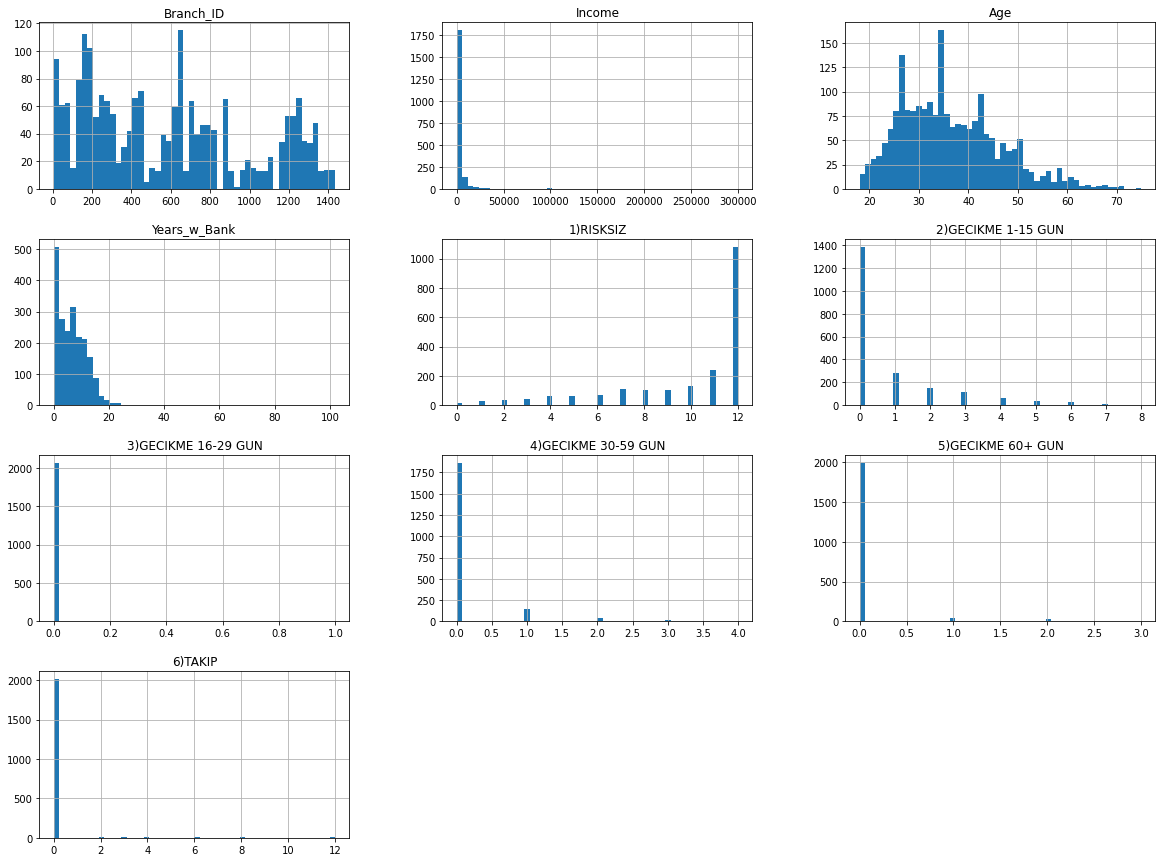

In [21]:
# Data Exploration
%matplotlib inline
import matplotlib.pyplot as plt
marriage_df.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
marriage_df.describe()

,Branch_ID,Income,Age,Years_w_Bank,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,4)GECIKME 30-59 GUN,5)GECIKME 60+ GUN,6)TAKIP
count,2065.000000,2011.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000
mean,583.900726,3628.047971,36.228571,7.026634,9.949637,0.753027,0.000484,0.141404,0.049879,0.152542
std,416.907325,10657.754928,10.029803,5.297704,2.996183,1.378483,0.022006,0.486598,0.276557,1.124289
min,4.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199.000000,1200.000000,29.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.000000,2000.000000,35.000000,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,874.000000,3000.000000,43.000000,10.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1436.000000,300000.000000,75.000000,102.000000,12.000000,8.000000,1.000000,4.000000,3.000000,12.000000


## Data Processing

In [23]:
#train/test split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(marriage_df, test_size = 0.2, random_state = 16)

In [24]:
# separate labels from feature matrix
train_y = train_set['Marital_Status']
train_X = train_set.drop('Marital_Status', axis = 1)
test_y = test_set['Marital_Status']
test_X = test_set.drop('Marital_Status', axis = 1)

In [25]:
train_y_md = (train_y == 'EVLİ')
test_y_md = (test_y == 'EVLİ')

In [26]:
#pipeline

# locations, gender, marital status, education level, job status, penalties
# Additional processing with full data set: drop home region branch region nulls

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler())
])

In [27]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline  = Pipeline([
('cat_encoder', OneHotEncoder())
])

In [28]:
from sklearn.compose import ColumnTransformer
num_attribs = ['Branch_ID', 'Income', 'Age', 'Years_w_Bank', '1)RISKSIZ', '2)GECIKME 1-15 GUN',
               '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN', '5)GECIKME 60+ GUN', '6)TAKIP']
cat_attribs = ['Cust_Segment', 'Gender', 'Education_Lv', 'Job_Status', 'Work_Region', 'Home_Region', 'Branch_Region']

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs),
])

In [29]:
train_X_prepared = full_pipeline.fit_transform(train_X)

## Dimensionality Reduction

In [218]:
#pca
from sklearn.decomposition import TruncatedSVD

TruncSVD = TruncatedSVD(n_components = 17)
TruncSVD.fit(train_X_prepared)
cumsum = np.cumsum(TruncSVD.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [219]:
d

16

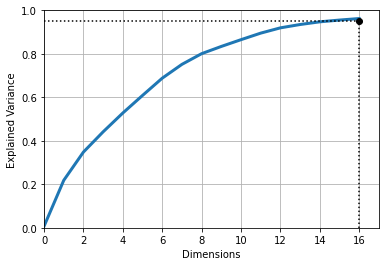

In [220]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 17, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

In [221]:
TruncSVD = TruncatedSVD(n_components=0.95)
X_reduced = TruncSVD.fit_transform(train_X_prepared)

TypeError: 'float' object cannot be interpreted as an integer

## Train Model

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(train_X_prepared, train_y_md)

# gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1)
# gbrt.fit(X, y)

In [31]:
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=120)

In [32]:
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [252]:
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(train_X_prepared, train_y_md)

GradientBoostingRegressor(max_depth=2, n_estimators=59)

In [253]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=59)
gbrt.fit(train_X_prepared, train_y_md)

GradientBoostingRegressor(max_depth=2, n_estimators=59)

In [259]:
from sklearn.metrics import accuracy_score

y_pred = gbrt.predict(train_X_prepared)
accuracy_score(train_y_md, y_pred)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [255]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gbrt, train_X_prepared, train_y_md, cv = 3)

In [256]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_md, y_train_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [260]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1,
    oob_score=True)

bag_clf.fit(train_X_prepared, train_y_md)

bag_clf.oob_score_

0.7469733656174334

In [261]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(train_X_prepared)
accuracy_score(train_y_md, y_pred)

0.7687651331719129

In [ ]:
# How to treat branch_id - should be discrete